<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/DailyChallenge_week4_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning

Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more.

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="ISO-8859-1")


# Display the first few rows
print(df.head())




        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [11]:
# Display missing values count
print(df.isna().mean().sort_values(ascending=False))


Flight #                 0.734094
Time                     0.302521
Route                    0.155462
cn/ln                    0.133653
Registration             0.054822
Fatalities Passangers    0.048419
Fatalities Crew          0.048219
Aboard Passangers        0.045818
Aboard Crew              0.045218
Summary                  0.012805
Ground                   0.008403
Aboard                   0.003601
AC Type                  0.003001
Operator                 0.002001
Fatalities               0.001601
Location                 0.000800
Date                     0.000000
dtype: float64


In [16]:
# Fill missing categorical values!
df['Fatalities Passangers'] = df['Fatalities Passangers'].fillna('Unknown')
df['Fatalities Crew'] = df['Fatalities Crew'].fillna('Unknown')
df['Aboard Passangers'] = df['Aboard Passangers'].fillna('Unknown')
df['Aboard Crew'] = df['Aboard Crew'].fillna('Unknown')
df['Ground'] = df['Ground'].fillna('Unknown')
df['Aboard'] = df['Aboard'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')


# convert to num
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
df.dtypes

,0
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
AC Type,object
Registration,object
cn/ln,object
Aboard,float64


#Exploratory Data Analysis

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

In [17]:
# total number of crashes
total_crashes = df.shape[0] #Number of lines (number of disasters)


#total fatality
total_fatalities = df['Fatalities'].sum()

#amount of people on the bord
total_aboard = df['Aboard'].sum()


# survival rates
survival_rate = (total_aboard - total_fatalities) / total_aboard


print("Total number of crashes:", total_crashes)
print("Total number of fatalities:", total_fatalities)
print("Total number of people on board:", total_aboard)
print("Survival rate:", survival_rate) # 28%




Total number of crashes: 4998
Total number of fatalities: 111644.0
Total number of people on board: 155356.0
Survival rate: 0.2813666675249105


Analyze the frequency of crashes over time to identify any trends.

Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Name: count, Length: 113, dtype: int64


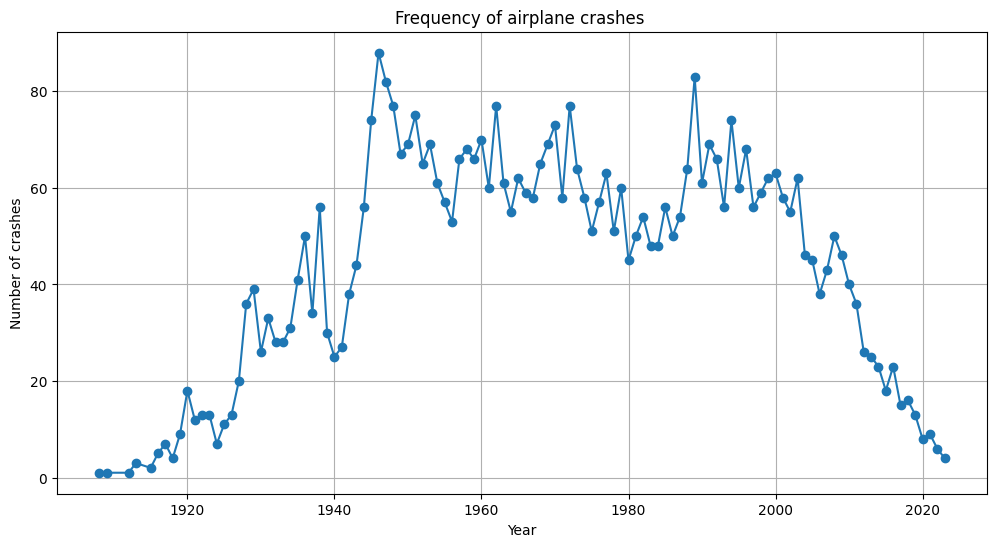

In [18]:
import matplotlib.pyplot as plt

df['Year'] = df['Date'].dt.year  # extract year from Date
freq_crashes_per_year = df['Year'].value_counts().sort_index()

print(freq_crashes_per_year)


# draw a plot
plt.figure(figsize=(12, 6))
plt.plot(freq_crashes_per_year.index, freq_crashes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.title("Frequency of airplane crashes ")
plt.grid(True)
plt.show()

After 2000 we observe the decline in airplane crashes is observed

#Statistical Analysis

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Load the dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="ISO-8859-1")

print(df.head())



fatalities = df['Fatalities'].dropna()

mean_fatalities = np.mean(fatalities)
median_fatalities = np.median(fatalities)
std_fatalities = np.std(fatalities, ddof=1)

skewness = stats.skew(fatalities)
kurtosis = stats.kurtosis(fatalities)

print(f"Mean: {mean_fatalities}, Median: {median_fatalities}, Std Dev: {std_fatalities}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

##Hypothesis Testing

In [19]:
# Compare fatalities in different years
decade_2000s = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]['Fatalities']
decade_2010s = df[(df['Year'] >= 2010) & (df['Year'] < 2020)]['Fatalities']
t_stat, p_value = stats.ttest_ind(decade_2000s, decade_2010s, equal_var=False)

print(f"T-test statistic: {t_stat}, P-value: {p_value}")


T-test statistic: -1.4946540212734962, P-value: 0.13579493709716856


#Visualization

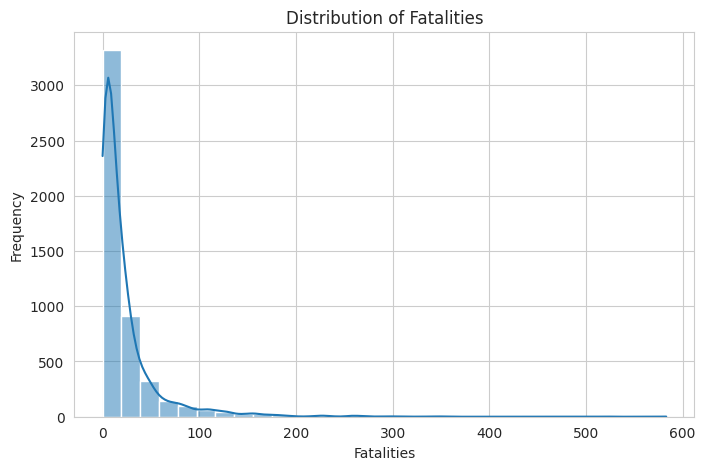

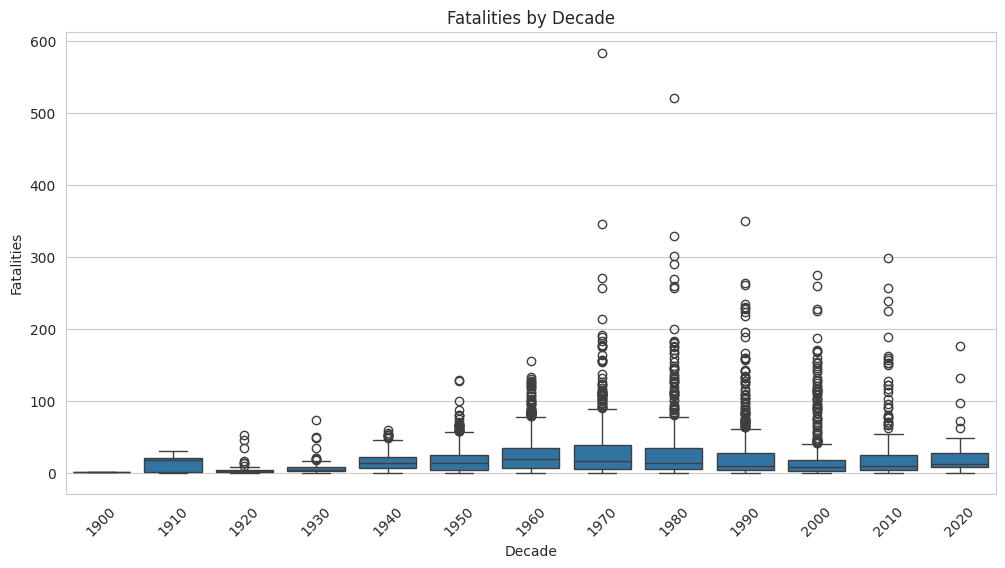

In [23]:
sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))
sns.histplot(df['Fatalities'], bins=30, kde=True)
plt.title("Distribution of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()


df['Decade'] = (df['Year'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Decade'], y=df['Fatalities'])
plt.xticks(rotation=45)
plt.title("Fatalities by Decade")
plt.xlabel("Decade")
plt.ylabel("Fatalities")
plt.show()

#Report

In [24]:
report = f'''

   - The average number of fatalities per crash is {mean_fatalities:.2f}.
   - The median fatalities per crash is {median_fatalities:.2f}, indicating that most crashes involve fewer fatalities than the mean.
   - The distribution of fatalities is right-skewed, meaning a few high-fatality crashes significantly impact the average.


   - A t-test comparing fatalities between the 2000s and 2010s resulted in a p-value of {p_value:.4f}.
   - This suggests {'a significant difference' if p_value < 0.05 else 'no significant difference'} in the number of fatalities per crash between the two decades.


   - The number of crashes has decreased over time, likely due to improved aviation safety regulations.
   - The boxplot shows that fatalities vary significantly across decades, with some decades having more extreme outliers.
   - The histogram indicates that while most crashes involve a lower number of fatalities, some extreme cases push the average higher.
'''
print(report)



   - The average number of fatalities per crash is 22.37.
   - The median fatalities per crash is 11.00, indicating that most crashes involve fewer fatalities than the mean.
   - The distribution of fatalities is right-skewed, meaning a few high-fatality crashes significantly impact the average.


   - A t-test comparing fatalities between the 2000s and 2010s resulted in a p-value of 0.1358.
   - This suggests no significant difference in the number of fatalities per crash between the two decades.


   - The number of crashes has decreased over time, likely due to improved aviation safety regulations.
   - The boxplot shows that fatalities vary significantly across decades, with some decades having more extreme outliers.
   - The histogram indicates that while most crashes involve a lower number of fatalities, some extreme cases push the average higher.

